<a href="https://colab.research.google.com/github/Isra1997/Top-hat-tranform/blob/master/Top_hat_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

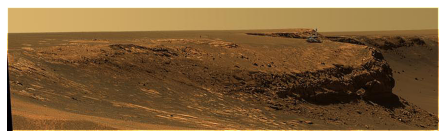

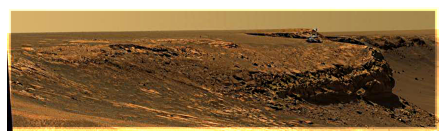

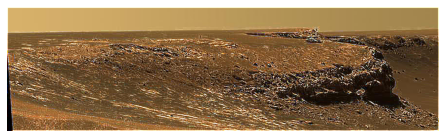

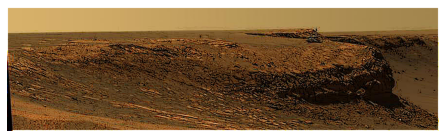

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

def dilation(img,d):
  dilated=np.zeros(img.shape)
  for i in range(int(d/2),img.shape[0]-int(d/2)):
    for j in range(int(d/2),img.shape[1]-int(d/2)):
      dilated[i,j]=np.amax(img[i-int(d/2):i+int(d/2)+1,j-int(d/2):j+int(d/2)+1])
  return np.abs(dilated)

def erosion(img,d):
  eroded=np.zeros(img.shape)
  for i in range(int(d/2),img.shape[0]-int(d/2)):
    for j in range(int(d/2),img.shape[1]-int(d/2)):
      eroded[i,j]=np.amin(img[i-int(d/2):i+int(d/2)+1,j-int(d/2):j+int(d/2)+1])
  return np.abs(eroded)

def increaseContrast(image,a,b,dimension):
  x=np.asarray(image)
  colorImageArray=np.zeros(x.shape)
  for i in range(0,3):
    img = x[:,:,i]
    closed=erosion(dilation(img,dimension),dimension)
    opened=dilation(erosion(img,dimension),dimension)
    # Top-hat transform : This operation produced an images that contains the
    #  bright elemnts of the image that are smaller than the structuring element.
    Top_hat=np.subtract(img,opened)
    bright_elements=np.multiply(Top_hat,a)
    # Black-hat transform : This operation produced an images that contains the
    # darker elemnts of the image that are smaller than the structuring element.
    Black_hat= np.subtract(closed,img)
    dark_elements=np.multiply(Black_hat,b)
    kernal=np.subtract(bright_elements,dark_elements)
    colorImageArray[:,:,i]=np.clip(np.add(img,kernal),0,255)
  colorImageArray=colorImageArray.astype(np.uint8)

  z=Image.fromarray(colorImageArray)
  
  fig = plt.figure(frameon=False)


  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.imshow(z)
  return z

  # comment on the kernal size
      # As the kernal size increases the elements that only the large elements 
      # of the image will be incorprated in the result and the small details will be lost.
  
  # Comment on increasing or decreasing the size of a or b
      # As the value of a increase the bright elements of the image will be enhanced 
      # as the weight given to the white-hat operation will increase and when added to the image 
      # caues thin white lines at protusions in the output image. This is because bright pixels 
      # in the image incearse untill the reach 255 causing these lines. Thus increasing a will 
      # decrease the overall contrast of the image.

      # As the value of b increase the darker elements of the image will be enhanced 
      # as the weight given to the black-hat operation which produces an image 
      # that contains the darker elements in the image. Which will increase contrast in the 
      # output image as its subtracted from the image.
  
  # Suggesting a way to reduce contrast
      # In order to reduce contrast we can add the output of the black-hat operation and 
      # substract the white-hat opration from the image. Thus excluding the bright elements 
      # in the image and including only the darker elements which will result in a lower contrast.



def main():
  # open colour image
  image_file =Image.open('Mars.jpg') 
  # Mars_1
  Mars_1=increaseContrast(image_file,1,1,3)
  plt.savefig('Mars_1.jpg')
  # Mars_2
  Mars_2=increaseContrast(image_file,1,1,9)
  plt.savefig('Mars_2.jpg')
  # Mars_3
  Mars_3=increaseContrast(image_file,5,1,3)
  plt.savefig('Mars_3.jpg')
  # Mars_4
  Mars_3=increaseContrast(image_file,1,5,3)
  plt.savefig('Mars_4.jpg')
  
if __name__=='__main__':
  main()



In [0]:
from google.colab import drive
drive.mount('/content/drive')